# Naloga 2: Mangan

V datoteki Mangan so podatki o deležu mangana v železu, pridobljenem v plavžu:
skozi 24 dni so vsak dan analizirali pet odlitkov. Preučite normalnost dobljene
empirične porazdelitve.

In [8]:
import pandas as pd
import math
import numpy
from random import seed, randint
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
Mangan = pd.read_csv("Mangan.csv")
Mangan

,dan,odlitek1,odlitek2,odlitek3,odlitek4,odlitek5
0,1,1.40,1.28,1.36,1.38,1.44
1,2,1.40,1.34,1.54,1.44,1.46
2,3,1.80,1.44,1.46,1.50,1.38
3,4,1.54,1.50,1.48,1.52,1.58
4,5,1.52,1.46,1.42,1.58,1.70
5,6,1.62,1.58,1.62,1.76,1.60
6,7,1.58,1.64,1.62,1.72,1.60
7,8,1.62,1.46,1.38,1.42,1.38
8,9,1.60,1.44,1.46,1.38,1.34
9,10,1.38,1.34,1.36,1.58,1.38


**Širino posameznega razreda določite v skladu z modificiranim Freedman–Diaconisovim pravilom.**

In [35]:
delezi = list(Mangan.odlitek1) + list(Mangan.odlitek2) + list(Mangan.odlitek3) + list(Mangan.odlitek4) + list(Mangan.odlitek5)

In [36]:
#koda vzeta s strani http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = numpy.asarray(data, dtype=numpy.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / numpy.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

freedman_diaconis(delezi, 'bins')

c:\Users\gajaj\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\stats\_stats_py.py:3171: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


11

**histogram z dorisano normalno gostoto**

---

In [42]:
#pričakovana vrednost se ujema s povprečjem
povprecje = numpy.mean(delezi)
povprecje

1.409

In [41]:
#standardni odklon izracunamo s pomocjo funkcije .std()
standardni_odklon = numpy.std(delezi)
standardni_odklon

0.15055120944936531

In [43]:
# gostota normalne porazdelitve
def normalna(x, pov, st):
    return 1/ (st*(2*math.pi)**0.5) * math.e**(-0.5*((x-pov)/st)**2)

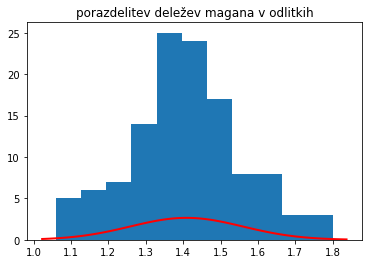

In [45]:
#histogram
from turtle import color


plt.hist(delezi, bins=11)

# PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = normalna(x, povprecje, standardni_odklon)

  
plt.plot(x, p, 'k', linewidth=2, color='r')
title = "porazdelitev deležev magana v odlitkih".format(povprecje, standardni_odklon)
plt.title(title)
  
plt.show()

**viseči histogram razlik korenov frekvenc**

---

In [62]:
#zaokrožimo vrednosti v delezi
zaokrozeni_delezi = []
for x in delezi:
    zaokrozeni_delezi.append(round(x, 1))

In [67]:
#naredimo tabelo frekvenc
#define Series
data = pd.Series(zaokrozeni_delezi)

#find frequencies of each value
tabela_frekvenc = data.value_counts().sort_index()
tabela_frekvenc

1.1     5
1.2    10
1.3    23
1.4    35
1.5    28
1.6    13
1.7     3
1.8     3
dtype: int64

In [73]:
Mangan.value_counts(['odlitek1', 'odlitek2'])

odlitek1  odlitek2
1.80      1.44        1
1.62      1.58        1
1.24      1.22        1
1.26      1.50        1
1.30      1.48        1
          1.52        1
1.32      1.22        1
          1.40        1
1.34      1.28        1
1.38      1.34        1
1.40      1.28        1
          1.34        1
1.42      1.32        1
1.44      1.28        1
1.48      1.46        1
1.50      1.42        1
          1.46        1
1.52      1.46        1
          1.50        1
1.54      1.50        1
1.58      1.64        1
1.60      1.44        1
1.62      1.46        1
1.16      1.34        1
dtype: int64

In [87]:
frekvence = Mangan[['odlitek1', 'odlitek2', 'odlitek3', 'odlitek4', 'odlitek5']].apply(pd.Series.value_counts)
frekvence

,odlitek1,odlitek2,odlitek3,odlitek4,odlitek5
1.06,NaN,NaN,NaN,1.0,NaN
1.08,NaN,NaN,1.0,1.0,NaN
1.10,NaN,NaN,1.0,NaN,1.0
1.16,1.0,NaN,NaN,2.0,NaN
1.18,NaN,NaN,NaN,3.0,NaN
1.20,NaN,NaN,1.0,NaN,NaN
1.22,NaN,2.0,NaN,NaN,NaN
1.24,1.0,NaN,NaN,NaN,NaN
1.26,1.0,NaN,NaN,1.0,1.0
1.28,NaN,3.0,2.0,NaN,3.0


In [93]:
for index, row in frekvence.iterrows():
    for i in row:
        print(i)
    print('---')

nan
nan
nan
1.0
nan
1.0
---
nan
nan
1.0
1.0
nan
1.0
---
nan
nan
1.0
nan
1.0
1.0
---
1.0
nan
nan
2.0
nan
1.0
---
nan
nan
nan
3.0
nan
3.0
---
nan
nan
1.0
nan
nan
1.0
---
nan
2.0
nan
nan
nan
2.0
---
1.0
nan
nan
nan
nan
1.0
---
1.0
nan
nan
1.0
1.0
1.0
---
nan
3.0
2.0
nan
3.0
3.0
---
2.0
nan
nan
1.0
nan
2.0
---
2.0
1.0
nan
nan
nan
2.0
---
1.0
3.0
nan
1.0
1.0
1.0
---
nan
nan
2.0
2.0
4.0
2.0
---
1.0
nan
2.0
3.0
5.0
1.0
---
2.0
1.0
2.0
nan
1.0
2.0
---
1.0
1.0
1.0
2.0
nan
1.0
---
1.0
2.0
nan
1.0
1.0
1.0
---
nan
4.0
3.0
nan
1.0
4.0
---
1.0
1.0
3.0
nan
nan
1.0
---
2.0
3.0
nan
1.0
1.0
2.0
---
2.0
1.0
1.0
1.0
nan
2.0
---
1.0
nan
1.0
nan
1.0
1.0
---
1.0
1.0
nan
2.0
1.0
1.0
---
1.0
nan
nan
nan
2.0
1.0
---
2.0
nan
2.0
nan
nan
2.0
---
nan
1.0
nan
nan
nan
1.0
---
nan
nan
nan
nan
1.0
1.0
---
nan
nan
1.0
1.0
nan
1.0
---
nan
nan
1.0
1.0
nan
1.0
---
1.0
nan
nan
nan
nan
1.0
---


In [95]:
seznam_vsot = []
for index, row in frekvence.iterrows():
    vsota = 0
    for i in row:
        if not math.isnan(i):
            vsota += i
    seznam_vsot.append(vsota)

frekvence['vsota'] = seznam_vsot
frekvence

,odlitek1,odlitek2,odlitek3,odlitek4,odlitek5,vsota
1.06,NaN,NaN,NaN,1.0,NaN,2.0
1.08,NaN,NaN,1.0,1.0,NaN,3.0
1.10,NaN,NaN,1.0,NaN,1.0,3.0
1.16,1.0,NaN,NaN,2.0,NaN,4.0
1.18,NaN,NaN,NaN,3.0,NaN,6.0
1.20,NaN,NaN,1.0,NaN,NaN,2.0
1.22,NaN,2.0,NaN,NaN,NaN,4.0
1.24,1.0,NaN,NaN,NaN,NaN,2.0
1.26,1.0,NaN,NaN,1.0,1.0,4.0
1.28,NaN,3.0,2.0,NaN,3.0,11.0


**primerjalni kvantilni (Q–Q) grafikon**

---

In [53]:
#dodamo stolpec z povprečji
Mangan['povprecje'] = (Mangan.odlitek1 + Mangan.odlitek2 + Mangan.odlitek3 + Mangan.odlitek4 + Mangan.odlitek5) / 5

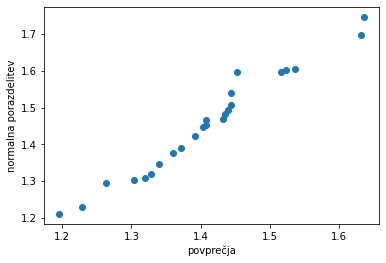

In [56]:
#obravnavamo povprečja deležev
podatki_normalne = numpy.random.normal(povprecje,standardni_odklon,24)
podatki_normalne.sort()

seznam_povprecij = list(Mangan.povprecje)
seznam_povprecij.sort()

plt.scatter(seznam_povprecij,podatki_normalne)

plt.xlabel("povprečja")
plt.ylabel("normalna porazdelitev")
plt.show()

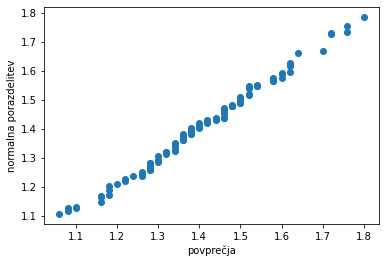

In [57]:
#obravnavamo vse deleže
podatki_normalne = numpy.random.normal(povprecje,standardni_odklon,len(delezi))
podatki_normalne.sort()

delezi.sort()

plt.scatter(delezi,podatki_normalne)

plt.xlabel("povprečja")
plt.ylabel("normalna porazdelitev")
plt.show()